In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from numpy import pi
from qiskit import QuantumCircuit, transpile, Aer, execute, IBMQ
from qiskit.circuit.library import QFT
from qiskit.tools.monitor import job_monitor
import operator
from qiskit.visualization import plot_histogram
clear_output()
provider = IBMQ.load_account()

In [2]:
def initialize_qubits(given_circuit, measurement_qubits, target_qubit):
    given_circuit.h(measurement_qubits)
    given_circuit.x(target_qubit)

In [3]:
def unitary_operator(given_circuit, control_qubit, target_qubit, theta):
    given_circuit.cp(2*pi*theta, control_qubit, target_qubit)

def unitary_operator_exponent(given_circuit, control_qubit, target_qubit, theta, exponent):
    given_circuit.cp(2*pi*theta*exponent, control_qubit, target_qubit)

In [4]:
def apply_iqft(given_circuit, measurement_qubits, n):
    given_circuit.append(QFT(n).inverse(), measurement_qubits)

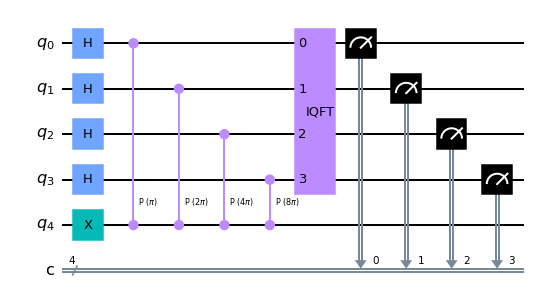

In [20]:
def qpe_program(n, theta):
    
    # Create a quantum circuit on n+1 qubits (n measurement, 1 target)
    qc = QuantumCircuit(n+1, n)
    
    # Initialize the qubits
    initialize_qubits(qc, range(n), n)
    
    # Apply the controlled unitary operators in sequence
    for x in range(n):
        exponent = 2**(x)
        unitary_operator_exponent(qc, x, n, theta, exponent)
        
    # Apply the inverse quantum Fourier transform
    apply_iqft(qc, range(n), n)
    
    # Measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

n = 4; theta = 0.5
mycircuit = qpe_program(n, theta)
mycircuit.draw(output='mpl')

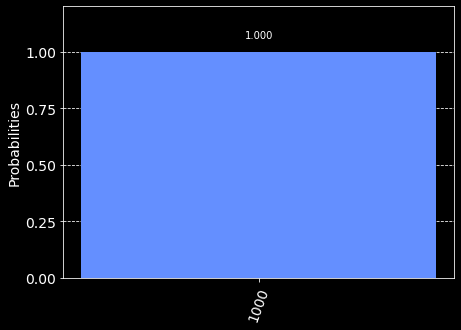

In [6]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
plot_histogram(counts)

In [7]:
highest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0]#[::-1]
print("Maimum probability at: ",highest_probability_outcome)
measured_theta = int(highest_probability_outcome, 2)/2**n
print("Using %d qubits with theta = %.3f, measured_theta = %.3f." % (n, theta, measured_theta))

Maimum probability at:  1000
Using 4 qubits with theta = 0.500, measured_theta = 0.500.


In [8]:
provider = IBMQ.get_provider(hub='ibm-q')
quito = provider.get_backend('ibmq_quito')

# Run with 2048 shots
shots = 2048
t_qpe = transpile(mycircuit, quito, optimization_level=3)
job = quito.run(t_qpe, shots=shots)
job_monitor(job)

Job Status: job has successfully run


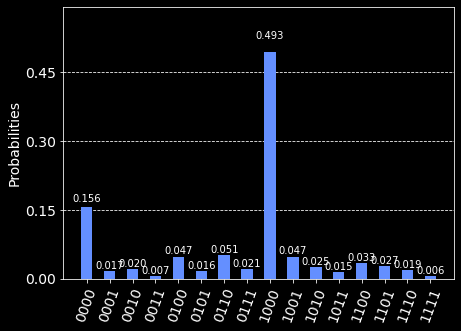

In [19]:
results = job.result()
answer = results.get_counts('circuit-0')
plot_histogram(answer)

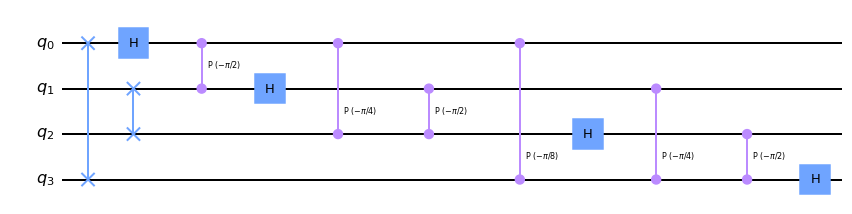

In [21]:
def qft_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j)
        qc.h(j)

qc = QuantumCircuit(4)
qft_dagger(qc,4)
qc.draw('mpl')

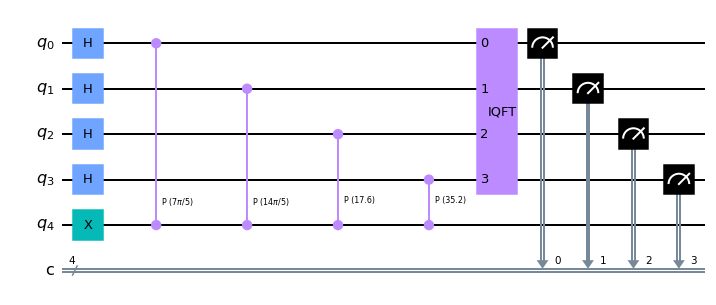

In [31]:
def qpe_program(n, theta):
    
    # Create a quantum circuit on n+1 qubits (n measurement, 1 target)
    qc = QuantumCircuit(n+1, n)
    
    # Initialize the qubits
    initialize_qubits(qc, range(n), n)
    
    # Apply the controlled unitary operators in sequence
    for x in range(n):
        exponent = 2**(x)
        unitary_operator_exponent(qc, x, n, theta, exponent)
        
    # Apply the inverse quantum Fourier transform
    apply_iqft(qc, range(n), n)
    
    # Measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

n = 4; theta = 0.7
mycircuit = qpe_program(n, theta)
mycircuit.draw(output='mpl')

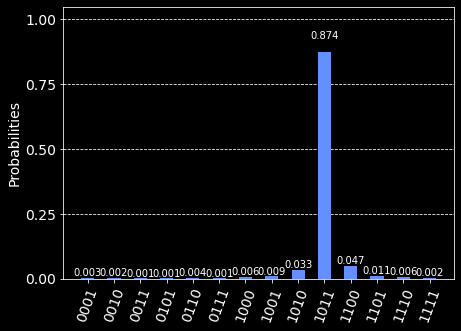

In [32]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
plot_histogram(counts)